In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from astropy import units as u
from astropy import constants as c
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# gray models w/o and with attenuation

In [2]:
def Tgray(tau,D,fs,fi,sigma=1):
    fac=0.5*(fs+fi)*(1.0+D*tau)
    return (fac/sigma)**0.25

def Tgrayatt(tau,D,k,fs,fi,sigma=1):
    fac=0.5*fs*(1.0+D/k+(k/D-D/k)*np.exp(-k*tau))+0.5*fi*(1.0+D*tau)
    #fac=0.5*fs*(1.0+k/D+(1 - (k/D)**2)*D*tau)+0.5*fi*(1.0+D*tau)
    return (fac/sigma)**0.25

In [3]:
taul=np.logspace(-5,2,1000)

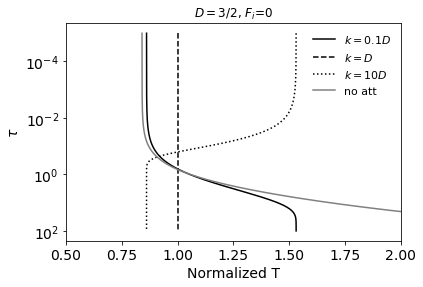

In [4]:
D=3/2.0
fs=1
fi=0.
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(Tgrayatt(taul,D,D*0.1,fs,fi),taul,c="black",ls="solid")
ax.plot(Tgrayatt(taul,D,D,fs,fi),taul,c="black",ls="dashed")
ax.plot(Tgrayatt(taul,D,D*10,fs,fi),taul,c="black",ls="dotted")

ax.plot(Tgray(taul,D,fs,fi),taul,c="gray",ls="solid")

plt.legend(["$k=0.1D$","$k=D$","$k=10D$","no att"],loc="upper right",prop={'size':11},frameon=False)
#ax.legend(["$\beta_0 = 0.1 \theta_E$","$\beta_0 = 0.3 \theta_E$","$\beta_0 = 0.7 \theta_E$"])
plt.tick_params(labelsize=14)
plt.xlim(0.5,2.0)
pylab.yscale("log")
plt.title("$D=3/2$, $F_i$=0")
plt.ylabel("$\\tau$",fontsize=14)
plt.xlabel("Normalized T",fontsize=14)
plt.gca().invert_yaxis()
plt.savefig("grayat.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

# "Radiative-Equilibirum" Earth model

In [5]:
sigmaSB=5.67*10**-8 #W/m2/K stephen Boltzman

In [6]:
# US-atmosphere
pus,tus=np.loadtxt("data/tpprof.txt",unpack=True)

In [7]:
def tau2P(tau,tau0,P0,N):
    return P0*(tau/tau0)**(1/N)

def tau2Pa(tau,tau0,P0,N,Pcrit=0.1):
    P=P0*(tau/tau0)**(1/N)
    mask=(P<Pcrit)
    tau1=tau[mask][-1]
    P[mask]=Pcrit*(tau[mask]/tau1)
    return P

In [8]:
def tau_schwarzschild_criterion(Gamma,N,D):
    return 4*Gamma/(D*(N-4*Gamma))

In [9]:
def dry_adiabatP(T,T0,P0,Gamma):
    P=P0*(T/T0)**(1.0/Gamma)
    return P

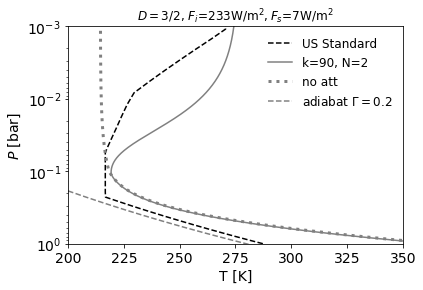

In [10]:
taul=np.logspace(-5,1,1000)
D=3/2.0
fs=7    #W/m2
fi=233  #W/m2
kx=90

gamma=1.4
Gammad=(gamma-1)/gamma*0.7
N=2
tau0=0.05
P0=0.1
tlist=np.linspace(200,300,1000)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(tus,pus/1000,c="black",ls="dashed",label="US Standard")
ax.plot(Tgrayatt(taul,D,kx,fs,fi,sigmaSB),tau2Pa(taul,tau0,P0,N=2),c="gray",ls="solid",label="k=90, N=2")
ax.plot(Tgray(taul,D,fs,fi,sigmaSB),tau2Pa(taul,tau0,P0,N=2),c="gray",ls="dotted",lw=3,label="no att")
ax.plot(tlist,dry_adiabatP(tlist,220,0.3,Gammad),label="adiabat $\Gamma=0.2$",color="gray",ls="dashed")
plt.legend(loc="upper right",prop={'size':12},frameon=False)
plt.tick_params(labelsize=14)
plt.ylim(0.001,1.0)
plt.xlim(200,350)

#If you wanna show the Schwarzschild Criterion, uncomment below.
#plt.axhline(tau2P(tau_schwarzschild_criterion(0.29,N,D),tau0,P0,N),ls="solid",c="red",lw=2)

pylab.yscale("log")
plt.title("$D=3/2$, $F_i$="+str(fi)+"$\\mathrm{W/m^2},F_s$="+str(fs)+"$\\mathrm{W/m^2}$")
plt.ylabel("$P$ [bar]",fontsize=14)
plt.xlabel("T [K]",fontsize=14)
plt.gca().invert_yaxis()
plt.savefig("grayrade.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

In [11]:
#Where is the Schwarzschild criterion?
P0=1#bar
tau0=1.9#
N=2
print("tau=",tau_schwarzschild_criterion(0.2,N,3/2))
print(tau2P(tau_schwarzschild_criterion(0.2,N,3/2),tau0,P0,N),"Bar")

tau= 0.44444444444444453
0.4836508334066745 Bar
